In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

# Configuraciones visuales
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Cargar dataset
df = pd.read_csv("./data/dataset_ready/movimientos.csv")
print("✅ Dataset cargado con shape:", df.shape)

# Cargar mapeo de clases
with open("./data/metadata/class_map.json") as f:
    class_map = json.load(f)
inv_class_map = {v: k for k, v in class_map.items()}


✅ Dataset cargado con shape: (14755, 135)


In [9]:
df.head()

,frame,x0,y0,z0,v0,x1,y1,z1,v1,x2,...,x31,y31,z31,v31,x32,y32,z32,v32,label,class_name
0,0,0.461306,0.489677,-0.563945,0.940928,0.421154,0.500493,-0.577231,0.932303,0.408851,...,0.190911,0.028501,-0.059710,0.348194,0.274224,0.012862,-0.104871,0.352307,0,caminar_adelante
1,1,0.460586,0.500435,0.271754,0.946705,0.427502,0.509361,0.236132,0.938848,0.424009,...,0.657215,0.167699,-0.355441,0.330400,0.715645,0.193336,-0.309224,0.352257,0,caminar_adelante
2,2,0.449797,0.591931,-0.209518,0.951073,0.426397,0.606314,-0.201491,0.943024,0.422974,...,0.472000,0.198100,-0.234792,0.317764,0.498947,0.187836,-0.270441,0.359704,0,caminar_adelante
3,3,0.455113,0.542746,-0.066639,0.955260,0.436500,0.549898,-0.115767,0.947602,0.435646,...,0.708011,0.183606,-0.209997,0.357759,0.806019,0.161902,-0.153239,0.400967,0,caminar_adelante
4,4,0.453485,0.618764,0.401858,0.958316,0.437141,0.627689,0.414420,0.951205,0.436094,...,0.558414,0.386862,-0.318784,0.345864,0.595146,0.392140,-0.211516,0.382264,0,caminar_adelante


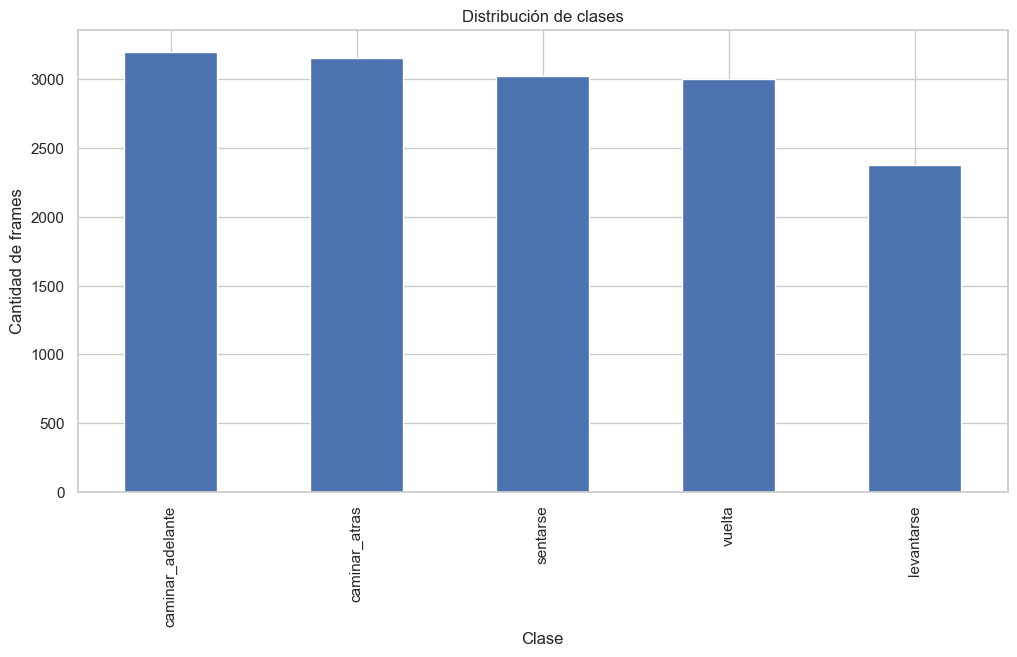

In [10]:
# Cantidad de clases
df['class_name'].value_counts().plot(kind='bar', title="Distribución de clases")
plt.xlabel("Clase")
plt.ylabel("Cantidad de frames")
plt.show()


In [11]:
# Ver columnas con posibles valores nulos
nulls = df.isnull().mean().sort_values(ascending=False)
print("Porcentaje de valores nulos por columna (top 10):")
print(nulls.head(10))


Porcentaje de valores nulos por columna (top 10):
frame    0.0
x21      0.0
z24      0.0
y24      0.0
x24      0.0
v23      0.0
z23      0.0
y23      0.0
x23      0.0
v22      0.0
dtype: float64


In [ ]:
# Eliminar filas con NaN
df_clean = df.dropna()
print("Filas eliminadas por valores nulos:", len(df) - len(df_clean))

Filas eliminadas por valores nulos: 0


In [13]:
# Calcular visibilidad promedio por fila
vis_cols = [f'v{i}' for i in range(33)]
df_clean['v_mean'] = df_clean[vis_cols].mean(axis=1)

# Filtrar frames con baja visibilidad
df_clean = df_clean[df_clean['v_mean'] >= 0.3]
print("Filas eliminadas por visibilidad < 0.3:", len(df) - len(df_clean))


Filas eliminadas por visibilidad < 0.3: 0


In [14]:
# Filtro por coordenadas fuera de [0, 1]
coord_cols = [col for col in df_clean.columns if col.startswith(('x', 'y'))]
before = len(df_clean)
df_clean = df_clean[(df_clean[coord_cols] >= 0.0).all(axis=1) & (df_clean[coord_cols] <= 1.0).all(axis=1)]
after = len(df_clean)
print(f"Filas eliminadas por coordenadas fuera de rango: {before - after}")


Filas eliminadas por coordenadas fuera de rango: 3938


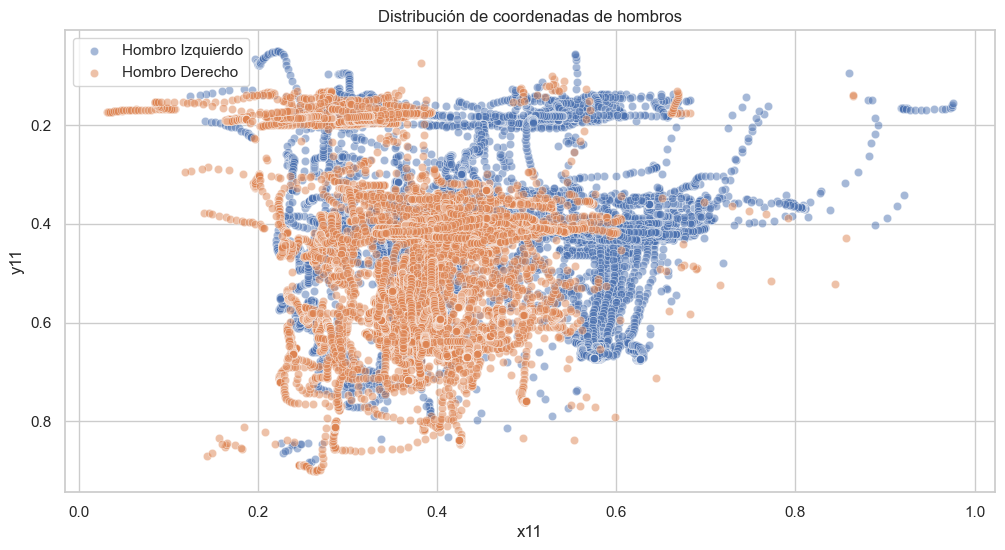

In [15]:
# Coordenadas de hombros (izquierdo = 11, derecho = 12)
sns.scatterplot(x=df_clean['x11'], y=df_clean['y11'], alpha=0.5, label='Hombro Izquierdo')
sns.scatterplot(x=df_clean['x12'], y=df_clean['y12'], alpha=0.5, label='Hombro Derecho')
plt.title("Distribución de coordenadas de hombros")
plt.gca().invert_yaxis()
plt.legend()
plt.show()


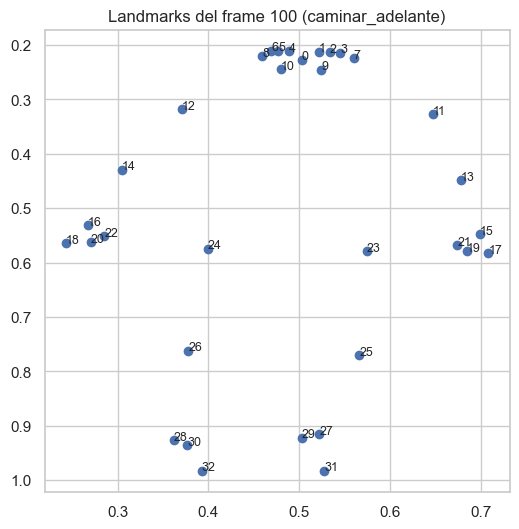

In [16]:
def plot_landmarks(df, frame_index):
    coords = []
    row = df.iloc[frame_index]
    for i in range(33):
        x, y = row[f'x{i}'], row[f'y{i}']
        coords.append((x, y))
    coords = np.array(coords)

    plt.figure(figsize=(6, 6))
    plt.scatter(coords[:, 0], coords[:, 1])
    for i, (x, y) in enumerate(coords):
        plt.text(x, y, str(i), fontsize=9)
    plt.gca().invert_yaxis()
    plt.title(f"Landmarks del frame {frame_index} ({row['class_name']})")
    plt.grid(True)
    plt.show()

# Ejemplo:
plot_landmarks(df_clean.reset_index(drop=True), frame_index=100)


In [17]:
# Guardar el dataset limpio
output_path = "./data/dataset_ready/movimientos_limpio.csv"
df_clean.to_csv(output_path, index=False)
print(f"Dataset limpio guardado en: {output_path}")

Dataset limpio guardado en: ./data/dataset_ready/movimientos_limpio.csv
